In [1]:
# Importing the libraries
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

# Importing the Boston Housing dataset
from sklearn.datasets import load_boston

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 96 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 232 from PyObject


In [2]:
# Loading the Boston Housing dataset
boston = load_boston()

In [3]:
# Initializing the dataframe
data = pd.DataFrame(boston.data)

In [4]:
#Adding the feature names to the dataframe
data.columns = boston.feature_names

In [5]:
#Adding target variable to dataframe
data['PRICE'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
#Check the shape of dataframe
data.shape

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [8]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [9]:
# Split the data into train and test with 80 train / 20 test
train, test = train_test_split(data, test_size=0.2, random_state = 1)
train, val = train_test_split(train, test_size=0.2, random_state = 1)

In [10]:
# Helper functions
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

def format_output(data):
    y1 = data.pop('PRICE')
    y1 = np.array(y1)
    y2 = data.pop('PTRATIO')
    y2 = np.array(y2)
    return y1, y2

In [11]:
# Get PRICE and PTRATIO as the 2 outputs and format them as np arrays
# PTRATIO - pupil-teacher ratio by town
train_stats = train.describe()
train_stats.pop('PRICE')
train_stats.pop('PTRATIO')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)
val_Y = format_output(val)

print(train_stats)

       count        mean         std        min         25%        50%  \
CRIM   323.0    3.882044    9.680410    0.00632    0.082865    0.25387   
ZN     323.0   12.233746   24.323780    0.00000    0.000000    0.00000   
INDUS  323.0   11.121796    6.876617    0.46000    5.190000    8.56000   
CHAS   323.0    0.080495    0.272481    0.00000    0.000000    0.00000   
NOX    323.0    0.553683    0.118625    0.38500    0.447500    0.53200   
RM     323.0    6.276935    0.691051    3.56100    5.886500    6.19300   
AGE    323.0   68.279876   28.452257    2.90000   43.550000   77.70000   
DIS    323.0    3.864749    2.154972    1.12960    2.120350    3.36030   
RAD    323.0    9.721362    8.801984    1.00000    4.000000    5.00000   
TAX    323.0  406.588235  170.365557  187.00000  279.000000  329.00000   
B      323.0  359.145604   89.252050    0.32000  376.355000  391.93000   
LSTAT  323.0   12.733529    7.251569    1.73000    7.065000   11.45000   

              75%       max  
CRIM   

In [12]:
# Normalize the training and test data
norm_train_X = np.array(norm(train))
norm_test_X = np.array(norm(test))
norm_val_X = np.array(norm(val))

In [13]:
def build_model():
    # Define model layers.
    input_layer = Input(shape=(len(train .columns),))
    first_dense = Dense(units='128', activation='relu')(input_layer)
    # Y1 output will be fed from the first dense
    y1_output = Dense(units='1', name='price_output')(first_dense)

    second_dense = Dense(units='128', activation='relu')(first_dense)
    # Y2 output will be fed from the second dense
    y2_output = Dense(units='1', name='ptratio_output')(second_dense)

    # Define the model with the input layer and a list of output layers
    model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

    return model

In [14]:
model = build_model()

# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=optimizer,
              loss={'price_output': 'mse', 'ptratio_output': 'mse'},
              metrics={'price_output': tf.keras.metrics.RootMeanSquaredError(),
                       'ptratio_output': tf.keras.metrics.RootMeanSquaredError()})

In [15]:
# Train the model for 100 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=100, batch_size=10, validation_data=(norm_test_X, test_Y))

Epoch 1/100
33/33 [==============================] - 2s 17ms/step - loss: 204.9992 - price_output_loss: 96.0113 - ptratio_output_loss: 108.9879 - price_output_root_mean_squared_error: 9.7985 - ptratio_output_root_mean_squared_error: 10.4397 - val_loss: 180.1942 - val_price_output_loss: 163.2335 - val_ptratio_output_loss: 16.9607 - val_price_output_root_mean_squared_error: 12.7763 - val_ptratio_output_root_mean_squared_error: 4.1183
Epoch 2/100
33/33 [==============================] - 0s 4ms/step - loss: 73.4462 - price_output_loss: 34.9536 - ptratio_output_loss: 38.4926 - price_output_root_mean_squared_error: 5.9122 - ptratio_output_root_mean_squared_error: 6.2042 - val_loss: 37.2614 - val_price_output_loss: 29.4227 - val_ptratio_output_loss: 7.8386 - val_price_output_root_mean_squared_error: 5.4243 - val_ptratio_output_root_mean_squared_error: 2.7998
Epoch 3/100
33/33 [==============================] - 0s 4ms/step - loss: 54.0061 - price_output_loss: 27.3981 - ptratio_output_loss: 26.

33/33 [==============================] - 0s 4ms/step - loss: 15.7844 - price_output_loss: 12.6736 - ptratio_output_loss: 3.1107 - price_output_root_mean_squared_error: 3.5600 - ptratio_output_root_mean_squared_error: 1.7637 - val_loss: 147.0905 - val_price_output_loss: 140.9426 - val_ptratio_output_loss: 6.1478 - val_price_output_root_mean_squared_error: 11.8719 - val_ptratio_output_root_mean_squared_error: 2.4795
Epoch 21/100
33/33 [==============================] - 0s 5ms/step - loss: 19.6710 - price_output_loss: 17.5983 - ptratio_output_loss: 2.0728 - price_output_root_mean_squared_error: 4.1950 - ptratio_output_root_mean_squared_error: 1.4397 - val_loss: 22.1754 - val_price_output_loss: 11.3829 - val_ptratio_output_loss: 10.7925 - val_price_output_root_mean_squared_error: 3.3738 - val_ptratio_output_root_mean_squared_error: 3.2852
Epoch 22/100
33/33 [==============================] - 0s 5ms/step - loss: 16.2121 - price_output_loss: 13.4017 - ptratio_output_loss: 2.8104 - price_outp

33/33 [==============================] - 0s 4ms/step - loss: 10.6721 - price_output_loss: 9.5070 - ptratio_output_loss: 1.1651 - price_output_root_mean_squared_error: 3.0833 - ptratio_output_root_mean_squared_error: 1.0794 - val_loss: 12.7349 - val_price_output_loss: 10.3868 - val_ptratio_output_loss: 2.3481 - val_price_output_root_mean_squared_error: 3.2228 - val_ptratio_output_root_mean_squared_error: 1.5324
Epoch 40/100
33/33 [==============================] - 0s 4ms/step - loss: 13.3071 - price_output_loss: 11.7340 - ptratio_output_loss: 1.5731 - price_output_root_mean_squared_error: 3.4255 - ptratio_output_root_mean_squared_error: 1.2542 - val_loss: 12.3623 - val_price_output_loss: 9.2085 - val_ptratio_output_loss: 3.1538 - val_price_output_root_mean_squared_error: 3.0346 - val_ptratio_output_root_mean_squared_error: 1.7759
Epoch 41/100
33/33 [==============================] - 0s 4ms/step - loss: 10.9093 - price_output_loss: 9.4861 - ptratio_output_loss: 1.4233 - price_output_root

33/33 [==============================] - 0s 4ms/step - loss: 8.0405 - price_output_loss: 7.0869 - ptratio_output_loss: 0.9536 - price_output_root_mean_squared_error: 2.6621 - ptratio_output_root_mean_squared_error: 0.9765 - val_loss: 12.4402 - val_price_output_loss: 9.3033 - val_ptratio_output_loss: 3.1369 - val_price_output_root_mean_squared_error: 3.0501 - val_ptratio_output_root_mean_squared_error: 1.7711
Epoch 59/100
33/33 [==============================] - 0s 4ms/step - loss: 7.2712 - price_output_loss: 6.3458 - ptratio_output_loss: 0.9254 - price_output_root_mean_squared_error: 2.5191 - ptratio_output_root_mean_squared_error: 0.9620 - val_loss: 11.8034 - val_price_output_loss: 9.5320 - val_ptratio_output_loss: 2.2714 - val_price_output_root_mean_squared_error: 3.0874 - val_ptratio_output_root_mean_squared_error: 1.5071
Epoch 60/100
33/33 [==============================] - 0s 4ms/step - loss: 8.1769 - price_output_loss: 6.9127 - ptratio_output_loss: 1.2643 - price_output_root_mean

33/33 [==============================] - 0s 4ms/step - loss: 7.1560 - price_output_loss: 6.2727 - ptratio_output_loss: 0.8833 - price_output_root_mean_squared_error: 2.5045 - ptratio_output_root_mean_squared_error: 0.9399 - val_loss: 11.7253 - val_price_output_loss: 9.3425 - val_ptratio_output_loss: 2.3828 - val_price_output_root_mean_squared_error: 3.0565 - val_ptratio_output_root_mean_squared_error: 1.5436
Epoch 78/100
33/33 [==============================] - 0s 4ms/step - loss: 6.4394 - price_output_loss: 5.8213 - ptratio_output_loss: 0.6181 - price_output_root_mean_squared_error: 2.4127 - ptratio_output_root_mean_squared_error: 0.7862 - val_loss: 12.2264 - val_price_output_loss: 9.9412 - val_ptratio_output_loss: 2.2853 - val_price_output_root_mean_squared_error: 3.1530 - val_ptratio_output_root_mean_squared_error: 1.5117
Epoch 79/100
33/33 [==============================] - 0s 4ms/step - loss: 6.2695 - price_output_loss: 5.6363 - ptratio_output_loss: 0.6333 - price_output_root_mean

33/33 [==============================] - 0s 4ms/step - loss: 5.3337 - price_output_loss: 4.6712 - ptratio_output_loss: 0.6625 - price_output_root_mean_squared_error: 2.1613 - ptratio_output_root_mean_squared_error: 0.8140 - val_loss: 16.6934 - val_price_output_loss: 13.6723 - val_ptratio_output_loss: 3.0211 - val_price_output_root_mean_squared_error: 3.6976 - val_ptratio_output_root_mean_squared_error: 1.7381
Epoch 97/100
33/33 [==============================] - 0s 4ms/step - loss: 5.1265 - price_output_loss: 4.5510 - ptratio_output_loss: 0.5754 - price_output_root_mean_squared_error: 2.1333 - ptratio_output_root_mean_squared_error: 0.7586 - val_loss: 17.2494 - val_price_output_loss: 14.8598 - val_ptratio_output_loss: 2.3896 - val_price_output_root_mean_squared_error: 3.8548 - val_ptratio_output_root_mean_squared_error: 1.5458
Epoch 98/100
33/33 [==============================] - 0s 4ms/step - loss: 4.7565 - price_output_loss: 4.3146 - ptratio_output_loss: 0.4420 - price_output_root_me

In [16]:
# Test the model and print loss and rmse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'price_loss: {Y1_loss}')
print(f'ptratio_loss: {Y2_loss}')
print(f'price_rmse: {Y1_rmse}')
print(f'ptratio_rmse: {Y2_rmse}')

3/3 [==============================] - 0s 5ms/step - loss: 14.6413 - price_output_loss: 13.0014 - ptratio_output_loss: 1.6400 - price_output_root_mean_squared_error: 3.6057 - ptratio_output_root_mean_squared_error: 1.2806

loss: 14.641337394714355
price_loss: 13.001360893249512
ptratio_loss: 1.6399766206741333
price_rmse: 3.6057400703430176
ptratio_rmse: 1.2806156873703003


In [17]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

4/4 [==============================] - 0s 2ms/step


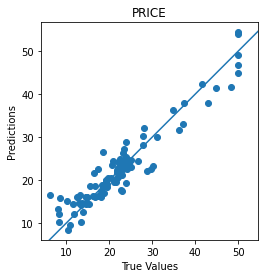

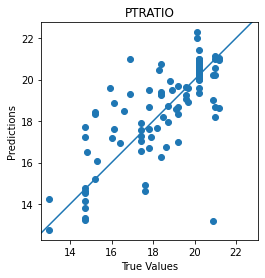

In [18]:
# Run predict
Y_pred = model.predict(norm_test_X)
price_pred = Y_pred[0]
ptratio_pred = Y_pred[1]

plot_diff(test_Y[0], Y_pred[0], title='PRICE')
plot_diff(test_Y[1], Y_pred[1], title='PTRATIO')